# Reverse Geocoding with Geopandas

This is a quick tutorial that shows how to use [GeoPandas](http://geopandas.org/) to do reverse geocoding with the [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods) dataset. 


These instructions are drawn from [a blog post about reverse geocoding by Bob Faffner](https://www.codementor.io/@bobhaffner/reverse-geocoding-bljjp5byw).

1. Loading Libraries and Data
2. Querying Geographic Data
3. Reverse Geocoding a buch of data with Pandas Apply

## Installing 3rd party libraries

To use GeoPandas we need to install the library on your computer. If you are using JupyterHub it is already installed, if you are using JupyterLab Desktop then you should run the line of code below. If you are in doubt, run the line below it won't break anything.


In [ ]:
conda install geopandas --yes

## Loading Libraries and Data

Note, we are using another 3rd party library called [shapely](http://shapely.readthedocs.io) which will be used to encode GPS coordinates into geographic points.

In [2]:
# load up the necessary libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from numpy import nan

## Loading Data

You need to have a geographic dataset that represents the units of interest. In the `files` directory is a [geojson](https://en.wikipedia.org/wiki/GeoJSON) file, `pgh_neighborhoods.geojson` that encodes all the neighborhoods in Pittsburgh. If you want to data analysis and visualization with neighborhoods, you should copy this file to your workspace.

In [3]:
# read the neighborhood geojson file
pgh_neighborhoods = gpd.read_file("files/pgh_neighborhoods.geojson")

## Quering Geographic Data

Geopandas gives you some geographically aware data structures built on top of the existing Pandas datastructures. This means you can perform a lot of standard Pandas operations on the data, like using query masks (which we will do shortly).

In [4]:
# take a peak at what these data look like
pgh_neighborhoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.338689e+07,31964.844864,"POLYGON ((-79.99633 40.39458, -79.99630 40.394..."
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,3.683820e+06,9978.225999,"POLYGON ((-80.06919 40.46046, -80.06912 40.460..."
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,6.425358e+06,25260.814467,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.027920e+07,16308.247349,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."


Geopandas plays nicely with matplotlib so you can make data driven maps quite easily. Here we are making a map of the data and using the [tab20 color map](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to distinguish each neighborhood visually. The colors don't represent any "data" per se, they just represent the individual neighborhoods. You will also notice there is not a distinct color for each neighborhood, that is because the `tab20` color map only has 20 distinct colors and there are 90 neighborhoods in Pittsburgh.

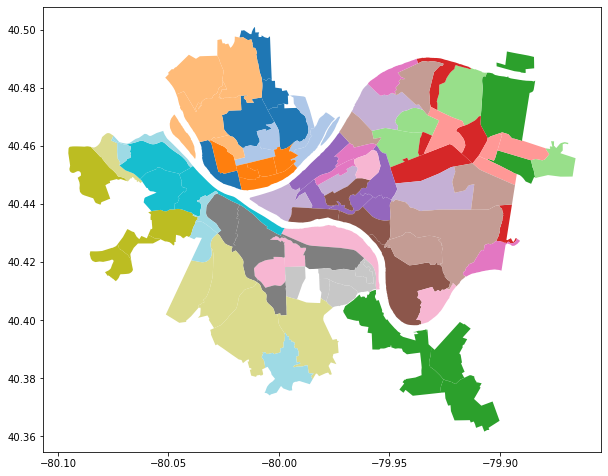

In [5]:
# plot the map using standard pandas plotting functions
pgh_neighborhoods.plot(figsize=(10,10), cmap="tab20"); #add semicolon to prevent ugly output

In [6]:
# what does the first item of the neighborhoods data look like?
pgh_neighborhoods.iloc[0]

objectid                                                         1293
fid_blockg                                                        201
statefp10                                                          42
countyfp10                                                        003
tractce10                                                      980600
blkgrpce10                                                          1
geoid10                                                  420039806001
namelsad10                                              Block Group 1
mtfcc10                                                         G5030
funcstat10                                                          S
aland10                                                        982752
awater10                                                       473795
intptlat10                                                +40.4518148
intptlon10                                               -080.0280506
shape_leng          

The two columns of data we will use are `hood` and `geometry`. The `hood` column contains the name of the neighborhood, the information we want to add to other datasets. The `geometry` column contains a POLYGON, which is basically a geographic shape representing a neighborhood. We can query this shape, that is, ask it if a particular set of GPS coordinates are located within the POLYGON using the [`contains()` function](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.contains.html). This will create a boolean mask (remember those!) that is True or False depending on if the point in question is "contained" by the POLYGON representing that neightborhood.

Let's start by trying to query for a location by hand. If we go to Wikipedia and click on the coordinate for the [Cathedral of Learning](https://en.wikipedia.org/wiki/Cathedral_of_Learning) we can get the specific decimal values for Cathy's location from [this website's entry for the Cathedral of Learning](https://tools.wmflabs.org/geohack/geohack.php?pagename=Cathedral_of_Learning&params=40_26_39_N_79_57_11_W_type:landmark_region:US)

In [7]:
# copy the lat/long values for Cathy into variables
latitude = 40.444167
longitude = -79.953056

Ok, now we need to introduce a new Python library called [Shapely](https://shapely.readthedocs.io/en/stable/project.html) that can translate GPS coordinates into a shape object that geopandas can understand.

In [8]:
# Now use that to create a Point object
location = Point((longitude, latitude)) # note the double parentheses
print(location)

POINT (-79.953056 40.444167)


In [9]:
# create a query mask using contains() and the Point
location_query = pgh_neighborhoods['geometry'].contains(location)
location_query

0     False
1     False
2     False
3     False
4     False
      ...  
85    False
86    False
87    False
88    False
89    False
Length: 90, dtype: bool

Somewhere in this Pandas Series is a `True`

In [10]:
# use the location_query mask to select only rows with True
pgh_neighborhoods[location_query]

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry
37,1330,1,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.390469e+07,20945.56257,"POLYGON ((-79.94969 40.45259, -79.94969 40.452..."


Let's look at all the data for that one row we got back using the index by location method `iloc`.

In [11]:
# display all the data for that one row as a Pandas Series so it is easier to read
pgh_neighborhoods[location_query].iloc[0]

objectid                                                         1330
fid_blockg                                                          1
statefp10                                                          42
countyfp10                                                        003
tractce10                                                      040400
blkgrpce10                                                          1
geoid10                                                  420030404001
namelsad10                                              Block Group 1
mtfcc10                                                         G5030
funcstat10                                                          S
aland10                                                         75472
awater10                                                            0
intptlat10                                                +40.4458408
intptlon10                                               -079.9483932
shape_leng          

In [12]:
# Get the value for the 'hood' column
pgh_neighborhoods[location_query].iloc[0]['hood']

'North Oakland'

So our code says the Cathedral of Learning is located in North Oakland, is that true?
[Google Maps seems to think so](https://goo.gl/maps/U1h3BJdmCem)

Great. So we know it works, now how can we use it on large amounts of data?

## Trees per neighborhood

If we have a lot of data, the code above would not work becuase we'd have to encode every point by hand. Let's load up a larger dataset and see if we can automate the geocoding process.

### Loading Data

I have downloaded the [City of Pittsburgh Trees](https://data.wprdc.org/dataset/city-trees) dataset in the `files` directory. For each tree there are GPS coordinates and the neighborhood. If we already have neighborhood, why are we doing the geocoding? Because this way we can verify that it works! 

In [13]:
# load the PGH Tree data
# adding low memory parameter to stop the warning
pgh_tree_data = pd.read_csv("files/trees.csv", low_memory=False) 
pgh_tree_data

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45704,39047675,499 N LANG AVE,N LANG AVE,Maple: Norway,Acer platanoides,15.0,15.0,NaN,NaN,NaN,...,Point Breeze North,9.0,14.0,4.200314e+10,2.0,14.0,4.0,3-14,40.453499,-79.901280
45705,1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139
45706,1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095
45707,1830872418,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.442946,-79.934062


### Use Pandas Apply() to process PGH tree data

Pandas has a lot of handy built-in functions, but it does not include a function that can perform the geographic query we demonstrated above. Instead, what we need to do is use a special dataframe function, `apply()` that allows us to create our own custom function that will be *applied* to every row of the data. Apply is kinda like using a `for` loop over every row of your dataframe, but it operates a bit faster. 

We need to create a python function that does the following:
* Take a row as an input parameter
* Convert the latitude and longitude columns of that row to a single "Point" object
* Perform a lookup in the pgh_neighborhoods data to see if that Point/Tree exists 
* Return the name of the neighborhood if it exists or return `NaN`

The function should be written as if it were inside a for loop that iterated over each row of the data, but `apply()` will handle all the looping by calling our function repeatedly and pass each row as a parameter to the function. This is preferable to looping looping over the datafarme in vanilla python because Pandas. 

What `apply()` will then return is a new Series of neighborhood names derived from the geolocation code. Then we can compare this list of neighborhoods with the actual neighborhood values in the tree data to see if it worked properly.

In [14]:
# create a function that we will supply to apply
def reverse_geolocate_neighborhood(row):
    """Given a row, grab the latitude and longitude columns and 
    return the neighborhood name (or nan for locations outside the dataset)."""
    
    # get the latitude and longitude 
    latitude = float(row['latitude'])
    longitude = float(row['longitude'])
    
    # create a shapely point from the GPS coordinates
    location = Point(longitude, latitude)
    
    # make a query mask and query the data on that location
    location_query = pgh_neighborhoods['geometry'].contains(location)
    result = pgh_neighborhoods[location_query]
    
    # if the location isn't in dataset it will be empty
    if result.empty:
        # location isn't within Pittsburgh, return not-a-number
        return nan
    else:
        # return a string of the "hood" where the point was located
        return result.iloc[0]['hood']

Now we can give our `reverse_goelocate_neighborhood` function as a parameter to the [dataframe apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function and Pandas process every row of the data using our custom function. This will create a new Pandas series with all the neighborhood names.

![Yo dawg meme](https://memegenerator.net/img/instances/65870158/yo-dawg-i-heard-you-like-functions-so-i-put-a-function-in-your-function.jpg)

**THIS CELL WILL TAKE A LONG TIME TO RUN BECAUSE IT IS CRUNCHING ALL THE DATA**

In [15]:
# perform reverse geocoding with every row in the pgh tree data
# save results as a new column in our tree dataframe
pgh_tree_data['new_neighborhood'] = pgh_tree_data.apply(reverse_geolocate_neighborhood, axis=1)
# select just the two neighborhood columns
pgh_tree_data[['neighborhood', 'new_neighborhood']]

,neighborhood,new_neighborhood
0,Homewood North,Homewood North
1,Oakwood,Oakwood
2,South Side Flats,South Side Flats
3,East Allegheny,East Allegheny
4,Highland Park,Highland Park
...,...,...
45704,Point Breeze North,Point Breeze North
45705,Squirrel Hill North,Squirrel Hill North
45706,Squirrel Hill North,Squirrel Hill North
45707,Squirrel Hill North,Squirrel Hill North


### Check our work

Did it work???

In [16]:
# compare the reverse geocoded data with the known values from the data
pgh_tree_data['neighborhood'].equals(pgh_tree_data['new_neighborhood'])

False

Ok, not entirely, but let's see where we went wrong

In [17]:
# create a mask where our derived neighborhood is different from the provided neighborhood
mask = pgh_tree_data['neighborhood'] != pgh_tree_data['new_neighborhood']
# apply the mask and select only the two 
pgh_tree_data[mask][['neighborhood', 'new_neighborhood']]

,neighborhood,new_neighborhood
14665,Carrick,NaN
19117,NaN,NaN
27018,NaN,NaN
27029,NaN,NaN
27040,NaN,NaN
...,...,...
45601,NaN,NaN
45602,NaN,NaN
45603,NaN,NaN
45604,NaN,NaN


Looks like we have a bunch of dirty data in the form of missing values. Not a number does not equal not a number so the only bad row is the tree in Carrick. This is not too big of a deal since we will automatically ignore missing values when we do our counts.

### Data Analysis and Visualization

Now we can answer the question, what is the distribution of trees per neighborhood in Pittsburgh?

In [18]:
# group by our derived neighborhood and count the number of trees in each group
# select the ID column because it has a short name, doesn't really matter which column we pick
# all the columns now contain counts
trees_per_neighborhood = pgh_tree_data.groupby('new_neighborhood').count()['id']
trees_per_neighborhood

new_neighborhood
Allegheny Center       867
Allegheny West         386
Allentown               84
Arlington              107
Arlington Heights        5
                      ... 
Upper Lawrenceville    373
West End               131
West Oakland            78
Westwood               260
Windgap                117
Name: id, Length: 90, dtype: int64

Now we can merge our counts into the geodataframe we loaded earlier to create a visualization.

In [19]:
# merge geodata with tree counts, joining on the columns with neighborhood data
trees_per_neighborhood_geo = pgh_neighborhoods.merge(trees_per_neighborhood, left_on='hood', right_on='new_neighborhood')
trees_per_neighborhood_geo.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry,id
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",276
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",79
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",6
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",114
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",367


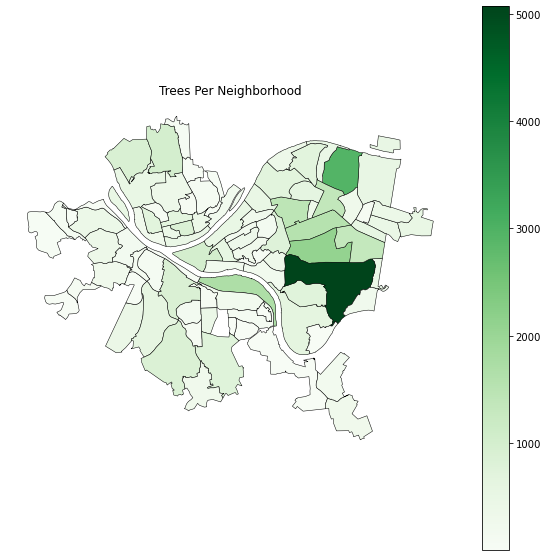

In [20]:
ax = trees_per_neighborhood_geo.plot(column="id",
                                figsize=(10,10), 
                                legend=True,
                                linewidth=0.5,
                                edgecolor='black',
                                cmap='Greens'
                               )
ax.set_title("Trees Per Neighborhood")
ax.axis('off'); #adding semicolon to clean up output

We can also make a list of top tree-y neighborhoods by  using `sort_values()` on our `trees_per_neighborhood` Series.

In [21]:
trees_per_neighborhood.sort_values(ascending=False).head(5)

new_neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
Name: id, dtype: int64

## GPS to Zip Codes

We can use the same procedure as above to figure out GPS coordinates to Zip codes. Let's load the [Public WiFi locations in Allegheny County](https://data.wprdc.org/dataset/public-wifi-locations) and see if we can answer the question: What zip code has the most public wifi hotspots?

### Loading Data

I have downloaded the dataset and saved it as `files/wifi.csv`.

In [22]:
# load the wifi data into a pandas dataframe
# making the zip codes a string so they're treated as categories
wifi = pd.read_csv("files/wifi.csv", dtype={"LocationZip":"str"})
wifi

,X,Y,objectid,globalid,LocationName,LocationDetails,LocationHours,SSID,PasswordRequired,PasswordDetails,...,LocationState,LocationZip,LocationWebsite,AmenitiesRestroom,AmenitiesSeating,AmenitiesVending,AmenitiesDetails,PublicNotes,LocationType,ID
0,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,NaN,...,PA,15212,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,NaN,...,PA,15216,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,NaN,...,PA,15226,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,NaN,...,PA,15210,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,NaN,...,PA,15206,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-79.932677,40.494381,167,42b75b40-20fd-422b-a930-df2a433a9e49,Dancing Gnome Brewing Company,Within 100 ft,Wed - Frid: 4 - 9 PM ; Sat - Sun: 12 - 4 PM,MetaMesh Public Wifi,No,NaN,...,PA,15215,https://www.dancinggnomebeer.com,Yes,Yes,NaN,Near Marina and other Sharpsburg Breweries,Brewery,Institutional,Dancing Gnome Brewing Company
132,-79.932152,40.494629,168,e294e3a7-18e0-4d57-8aae-966f67304360,Jacoby and Associates,Within 100 ft,Mon - Frid: 8:30 AM - 5 PM,MetaMesh Public Wifi,No,NaN,...,PA,15215,https://www.jacobyandassociates.com,NaN,NaN,NaN,Near Marina and Sharpsburg Breweries ; May bee...,Insurance Agency,Institutional,Jacoby and Associates
133,-79.932123,40.494880,169,0ba8c9ca-2f56-4018-ab71-688b740e1fec,Sugar Spell Scoops,Within 100 ft,"24 hours/day, 7 days/week",MetaMesh Public Wifi,No,NaN,...,PA,15215,https://www.sugarspellscoops.com,NaN,NaN,NaN,Near Marina and Sharpsburg Breweries ; May bee...,Ice Cream Parlor,Institutional,Sugar Spell Scoops
134,-79.843893,40.371366,170,27c064a6-e9c4-4666-8497-273570d9ef9b,Duquesne Family Center,Parking Lot,"24 hours/day, 7 days/week",AC_Public,no,NaN,...,PA,15110,NaN,no,no,no,NaN,NaN,Institutional,NaN


We have lat and long data, but they are labeled as x and y. Let's rename them.

In [23]:
# rename X and Y to be more representative of what they represent
wifi.rename(columns={"X":"longitude", "Y":"latitude"}, inplace=True)
wifi.head()

,longitude,latitude,objectid,globalid,LocationName,LocationDetails,LocationHours,SSID,PasswordRequired,PasswordDetails,...,LocationState,LocationZip,LocationWebsite,AmenitiesRestroom,AmenitiesSeating,AmenitiesVending,AmenitiesDetails,PublicNotes,LocationType,ID
0,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,NaN,...,PA,15212,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,NaN,...,PA,15216,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,NaN,...,PA,15226,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,NaN,...,PA,15210,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,NaN,...,PA,15206,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty


Now we need a geographic dataset for Zip codes boundaries in Allegheny County. I couldn't find this on WPRDC so I had to get it from the county's [Allegheny County Zip Code Boundaries](https://openac-alcogis.opendata.arcgis.com/datasets/df8e66efc3dd4f2aadae81b55b2b65e7_0?geometry=-80.741%2C40.251%2C-79.299%2C40.617) page which has a Geojson file. Saved as `files/ac-zip-code-boundaries.geojson` so if you want to do GPS to zip codes you should copy this file to your workspace.

In [24]:
# read in AC zip codes into a geodataframe
county_zipcodes = gpd.read_file("files/ac-zip-code-boundaries.geojson")
county_zipcodes.head()

,OBJECTID,ZIP,NAME,ZIPTYPE,STATE,STATEFIPS,COUNTYFIPS,COUNTYNAME,S3DZIP,LAT,...,MFDU,SFDU,BOXCNT,BIZCNT,RELVER,COLOR,GlobalID,SHAPE.STArea(),SHAPE.STLength(),geometry
0,4,15007,BAKERSTOWN,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.656688,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308124,"POLYGON ((-79.92421 40.65181, -79.92422 40.651..."
1,5,15014,BRACKENRIDGE,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.607964,...,59.0,1396.0,38.0,76.0,1.9.3,5.0,{D7938129-8427-49A4-8C6C-3A19848432D4},1.515338e+07,16855.546429,"POLYGON ((-79.73576 40.61129, -79.73574 40.611..."
2,6,15015,BRADFORD WOODS,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.636452,...,0.0,430.0,95.0,56.0,1.9.3,10.0,{BABB5D5E-1FF4-4E03-BBAB-B84CBB5BFB31},2.658386e+07,34637.659348,"POLYGON ((-80.07258 40.64492, -80.07241 40.644..."
3,8,15018,BUENA VISTA,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.289408,...,0.0,286.0,129.0,22.0,1.9.3,11.0,{4E2C2FAA-7976-4BEF-8119-BBB65C2F7014},6.087773e+07,76466.468736,"POLYGON ((-79.80552 40.24101, -79.80592 40.241..."
4,10,15020,BUNOLA,PO BOX,PA,42,42003,ALLEGHENY,150,40.219791,...,0.0,1.0,130.0,13.0,1.9.3,12.0,{6A1DF0B9-0732-465E-A020-6DBC3DCE93B3},5.373712e+07,51181.457073,"POLYGON ((-79.92674 40.24185, -79.92674 40.241..."


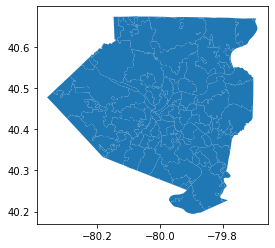

In [25]:
# plot it real quick to see if it is a map
county_zipcodes.plot(); #semicolon to clean up output

### Convert GPS to Zip Codes

Now we need to create a custom function that will take a row, create a `Point` object, and see if that point falls inside a zip code in Allegheny County. 

In [26]:
def reverse_geolocate_zip(row):
    """Given a row, grab the latitude and longitude columns and 
    return the neighborhood name (or nan for locations outside the dataset)."""
    
    # get the latitude and longitude 
    latitude = float(row['latitude'])
    longitude = float(row['longitude'])
    
    #create a point from the GPS coordinates
    location = Point(longitude, latitude)
    
    # make a query mask and query the data on that location
    location_query = county_zipcodes['geometry'].contains(location)
    result = county_zipcodes[location_query]
    
    # if the location isn't in dataset it will be empty
    if result.empty:
        # location isn't within Pittsburgh, return not-a-number
        return nan
    else:
        # return a string of the "ZIP" where the point was located
        return result.iloc[0]['ZIP']

OK, here comes the computationally hard part. We can process our data using `apply()` as we did above.

**RUNNING THIS CELL MIGHT TAKE SOME TIME DEPENDING ON THE SIZE OF YOUR DATA**

In [27]:
# apply our custom function on every row of the wifi dataset
# axis=1 means apply to rows
wifi['zip'] = wifi.apply(reverse_geolocate_zip, axis=1)
wifi

,longitude,latitude,objectid,globalid,LocationName,LocationDetails,LocationHours,SSID,PasswordRequired,PasswordDetails,...,LocationZip,LocationWebsite,AmenitiesRestroom,AmenitiesSeating,AmenitiesVending,AmenitiesDetails,PublicNotes,LocationType,ID,zip
0,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,NaN,...,15212,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny,15212
1,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,NaN,...,15216,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview,15216
2,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,NaN,...,15226,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline,15226
3,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,NaN,...,15210,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick,15210
4,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,NaN,...,15206,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty,15206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-79.932677,40.494381,167,42b75b40-20fd-422b-a930-df2a433a9e49,Dancing Gnome Brewing Company,Within 100 ft,Wed - Frid: 4 - 9 PM ; Sat - Sun: 12 - 4 PM,MetaMesh Public Wifi,No,NaN,...,15215,https://www.dancinggnomebeer.com,Yes,Yes,NaN,Near Marina and other Sharpsburg Breweries,Brewery,Institutional,Dancing Gnome Brewing Company,15215
132,-79.932152,40.494629,168,e294e3a7-18e0-4d57-8aae-966f67304360,Jacoby and Associates,Within 100 ft,Mon - Frid: 8:30 AM - 5 PM,MetaMesh Public Wifi,No,NaN,...,15215,https://www.jacobyandassociates.com,NaN,NaN,NaN,Near Marina and Sharpsburg Breweries ; May bee...,Insurance Agency,Institutional,Jacoby and Associates,15215
133,-79.932123,40.494880,169,0ba8c9ca-2f56-4018-ab71-688b740e1fec,Sugar Spell Scoops,Within 100 ft,"24 hours/day, 7 days/week",MetaMesh Public Wifi,No,NaN,...,15215,https://www.sugarspellscoops.com,NaN,NaN,NaN,Near Marina and Sharpsburg Breweries ; May bee...,Ice Cream Parlor,Institutional,Sugar Spell Scoops,15215
134,-79.843893,40.371366,170,27c064a6-e9c4-4666-8497-273570d9ef9b,Duquesne Family Center,Parking Lot,"24 hours/day, 7 days/week",AC_Public,no,NaN,...,15110,NaN,no,no,no,NaN,NaN,Institutional,NaN,15110


### Check our work

Because the wifi dataset includes zip codes, we can actually check our work. If your data does not have zip codes (which it probably does not) then you would skip this step.

In [28]:
# are the provided zip codes the same as our derived zip codes
wifi['LocationZip'].equals(wifi['zip'])

False

huh, looks like we have some bad data. Let's use a mask to find the rows where `LocationZip` is not equal (`!=`) to our derived zip code.

In [29]:
# create a mask where the zip code in the data is not equal to the zip code we derived
mask = wifi['LocationZip'] != wifi['zip']
# use the mask to select bad rows and then display the name and zip code columns 
wifi[mask][['LocationName', 'LocationZip','zip']]

,LocationName,LocationZip,zip
64,Jefferson Hills Public Library,15205,15025
66,Baldwin Borough Public Library,15227,15236
86,Gaudenzia Erie Inc,15219,15112
87,1101 Arlington Ave,15210,15203
97,RE360,15219,15210
111,Oporto and Gregory Street,15213,15203


So who is wrong, us or the WPRDC? If we look up the [Jefferson Hills Public Library](https://jeffersonhillslibrary.org/Home/AboutUs) it looks like the correct zip code is 15025. And if we look at the [Baldwin Borough Public Library](https://baldwinborolibrary.org/about/libraryinfo/) it looks like the correct zip code is 15236. If you look at all the bad zips, only the Gaudenzia Erie Inc entry is correct in the original data. It might be a bad GPS coordinate.

So our Zip codes are (for the most part) correct!


![I'm right](https://media.giphy.com/media/JoOtNkPck6Kgr6XABk/giphy.gif)

### Data Analysis and Visualization

So now we can answer our question, what zip code has the most public wifi.

In [30]:
# group by zip code, count, then select an arbirary column to get a Series
wifi_per_zip = wifi.groupby('zip').count()['SSID']
wifi_per_zip.head()

zip
15017    1
15025    3
15044    1
15064    1
15065    1
Name: SSID, dtype: int64

Merge the wifi_per_zip to the geodata and make a map!

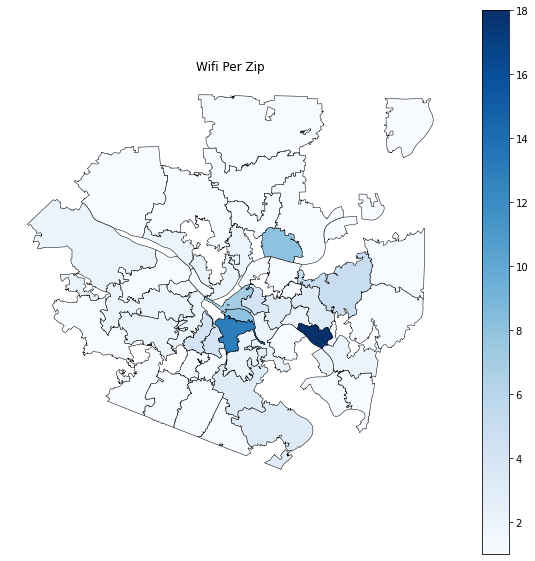

In [31]:
# merge our data
wifi_per_zip_geo = county_zipcodes.merge(wifi_per_zip, left_on="ZIP", right_on="zip")

# map our data
ax = wifi_per_zip_geo.plot(column='SSID', 
                      figsize=(10,10), 
                      legend=True,
                      linewidth=0.5,
                      edgecolor='black',
                      cmap='Blues'
                     )
ax.set_title("Wifi Per Zip")
ax.axis('off'); #adding semicolon to clean up output

Make a table!

In [32]:
# top 5 Zip codes with most wifi access points
wifi_per_zip.sort_values(ascending=False).head()

zip
15104    18
15210    13
15203     8
15215     8
15219     7
Name: SSID, dtype: int64

I will leave it as an exercise to the reader to map zip code to municipality.